In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Car Evaluation/car.data' , header=None)
df.columns = ['buying' , 'maint' , 'doors' , 'persons' , 'lug_boot' , 'safety' , 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df['buying'] = df['buying'].replace(['low' , 'med' , 'high' , 'vhigh'] , [0,1,2,3]).astype('int')
df['maint'] = df['maint'].replace(['low' , 'med' , 'high' , 'vhigh'] , [0,1,2,3]).astype('int')
df['doors'] = df['doors'].replace(['2' , '3' , '4' , '5more'] , [2,3,4,5]).astype('int')
df['persons'] = df['persons'].replace(['2' , '4' , 'more'] , [2,4,5]).astype('int')
df['lug_boot'] = df['lug_boot'].replace(['small' , 'med' , 'big'] , [1,2,3]).astype('int')
df['safety'] = df['safety'].replace(['low' , 'med' , 'high'] , [1,2,3]).astype('int')
df['class'] = df['class'].replace(['unacc' , 'acc' , 'good' , 'vgood'] , [1,2,3,4]).astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int32
 1   maint     1728 non-null   int32
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int32
 5   safety    1728 non-null   int32
 6   class     1728 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
buying,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
maint,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
doors,1728.0,3.500000,1.118358,2.0,2.75,3.5,4.25,5.0
persons,1728.0,3.666667,1.247580,2.0,2.00,4.0,5.00,5.0
lug_boot,1728.0,2.000000,0.816733,1.0,1.00,2.0,3.00,3.0
safety,1728.0,2.000000,0.816733,1.0,1.00,2.0,3.00,3.0
class,1728.0,1.414931,0.740700,1.0,1.00,1.0,2.00,4.0


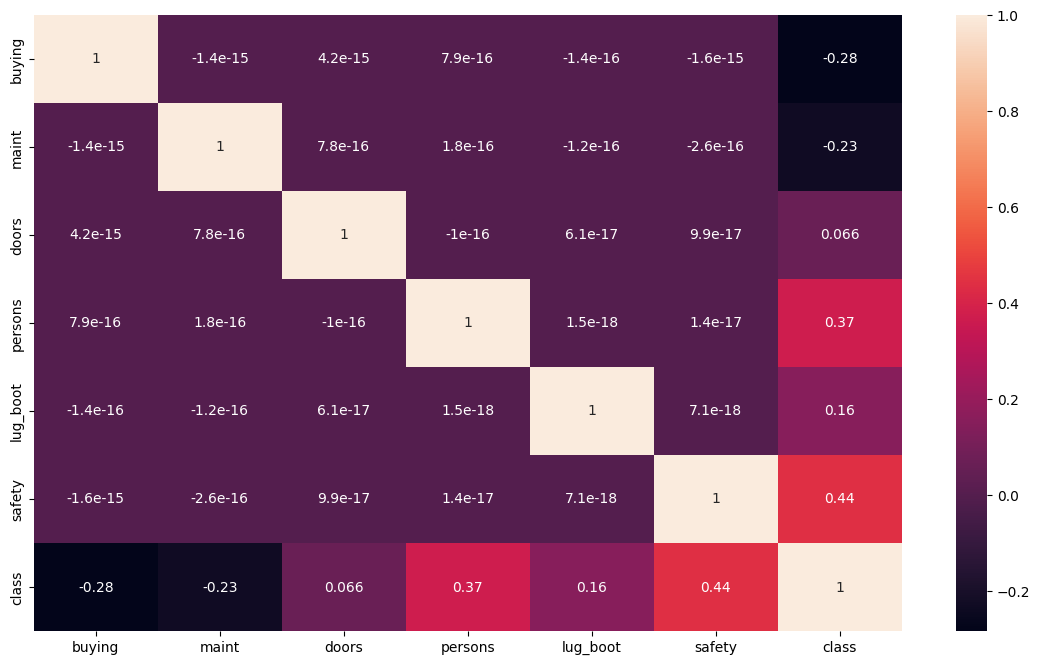

In [8]:
plt.figure(figsize=(14,8) ,dpi=100)

sns.heatmap(df.corr() , annot = True);

In [9]:
# Done

# Utils

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'class'
    
    def trainTest(data , label=label , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        X = data.drop(label ,axis = 1)
        y = data[label]
        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
        print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, average="weighted")}')
        print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, average="weighted")}')
        print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , average="weighted")}')
        
        
        print("\n****************\n")
        
        print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
        print(f'{name} Test Recall : {recall_score(y_test, y_pred, average="weighted")}')
        print(f'{name} Test Precision : {precision_score(y_test , y_pred, average="weighted")}')
        print(f'{name} Test F1 : {f1_score(y_test , y_pred, average="weighted")}')
        
    def get_f1_score(y_true, y_pred , name='Model'):
        return f1_score(y_true , y_pred , average="weighted")
    
    def get_recall(y_true, y_pred , name='Model'):
        return recall_score(y_true, y_pred, average="weighted")
    
    def get_roc_auc(y_true, y_pred , name='Model'):
        return roc_auc_score(y_true, y_pred, average="weighted")
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
    
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='classification'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional
            Datamızın task'i, by default 'classification'.
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , average='weighted'),
            "Precision" : precision_score(y_train, y_train_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , average='weighted'))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , average='weighted'),
            "Precision" : precision_score(y_test, y_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_test, y_pred , average='weighted'))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

### Train | Test Split

In [11]:
X_train , X_test, y_train , y_test = fonks.trainTest(df , stratify='y')

# Models

### Gaussian NB

In [12]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

fonks.simple_scores(y_train, nb_train_pred , y_test , nb_pred)

Model Train Accuracy : 0.7756874095513748
Model Train Recall : 0.7756874095513748
Model Train Precision : 0.8121983264476209
Model Train F1 : 0.7761402692061333

****************

Model Test Accuracy : 0.7687861271676301
Model Test Recall : 0.7687861271676301
Model Test Precision : 0.816256618254238
Model Test F1 : 0.774605453300882


In [13]:
fonks.eval_metric(y_train, nb_train_pred , y_test , nb_pred , 'NB')

Test_Set NB
[[219  17   0   6]
 [ 18  30   1  28]
 [  1   4   4   5]
 [  0   0   0  13]]
              precision    recall  f1-score   support

           1       0.92      0.90      0.91       242
           2       0.59      0.39      0.47        77
           3       0.80      0.29      0.42        14
           4       0.25      1.00      0.40        13

    accuracy                           0.77       346
   macro avg       0.64      0.65      0.55       346
weighted avg       0.82      0.77      0.77       346


Train_Set NB
[[894  55   1  18]
 [ 71 117   9 110]
 [  5  16   9  25]
 [  0   0   0  52]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       968
           2       0.62      0.38      0.47       307
           3       0.47      0.16      0.24        55
           4       0.25      1.00      0.40        52

    accuracy                           0.78      1382
   macro avg       0.57      0.62      0.51      1382
weigh

In [14]:
nb_f1 = fonks.get_f1_score(y_test , nb_pred , "NB")
nb_recall = fonks.get_recall(y_test , nb_pred , "NB")
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')
nb_rocauc = 0.98


nb_df = fonks.train_test_df(y_train, nb_train_pred , y_test , nb_pred , 'NB')
nb_df

,NB_train,NB_test
Accuracy,0.775687,0.768786
Recall,0.775687,0.768786
Precision,0.812198,0.816257
F1,0.880988,0.880117


### Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_base = DecisionTreeClassifier()

params = {'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,8) , 'max_features' : np.arange(2,8)}

dt_grid = GridSearchCV(dt_base , params , scoring='accuracy' , cv = 5) 
dt_grid.fit(X_train , y_train)

print(f'Best parameters: {dt_grid.best_params_}')
print(f'Best score: {dt_grid.best_score_:.2f}')

Best parameters: {'max_depth': 10, 'max_features': 7, 'min_samples_split': 2}
Best score: 0.98


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 6 , max_features= None , min_samples_split= 4)
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred)

Model Train Accuracy : 0.9240231548480463
Model Train Recall : 0.9240231548480463
Model Train Precision : 0.928282235896188
Model Train F1 : 0.9251990016431273

****************

Model Test Accuracy : 0.9017341040462428
Model Test Recall : 0.9017341040462428
Model Test Precision : 0.9060505096471203
Model Test F1 : 0.9031469489179451


In [17]:
fonks.eval_metric(y_train, dt_train_pred , y_test , dt_pred , 'DT')

Test_Set DT
[[229  12   1   0]
 [  9  61   6   1]
 [  0   0  12   2]
 [  0   3   0  10]]
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       242
           2       0.80      0.79      0.80        77
           3       0.63      0.86      0.73        14
           4       0.77      0.77      0.77        13

    accuracy                           0.90       346
   macro avg       0.79      0.84      0.81       346
weighted avg       0.91      0.90      0.90       346


Train_Set DT
[[935  30   3   0]
 [ 27 252  26   2]
 [  0   0  48   7]
 [  0  10   0  42]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       968
           2       0.86      0.82      0.84       307
           3       0.62      0.87      0.73        55
           4       0.82      0.81      0.82        52

    accuracy                           0.92      1382
   macro avg       0.82      0.87      0.84      1382
weigh

In [18]:
dt_f1 = fonks.get_f1_score(y_test , dt_pred , "DT")
dt_recall = fonks.get_recall(y_test , dt_pred , "DT")
# dt_rocauc = fonks.get_roc_auc(y_test , dt_pred , "DT")
# dt_rocauc = roc_auc_score(np.array(y_test.values), dt_pred, multi_class='ovr' , average='micro')

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([nb_df , dt_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test
Accuracy,0.775687,0.768786,0.924023,0.901734
Recall,0.775687,0.768786,0.924023,0.901734
Precision,0.812198,0.816257,0.928282,0.906051
F1,0.880988,0.880117,0.961873,0.950340


### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

fonks.simple_scores(y_train, knn_train_pred , y_test , knn_pred)

Model Train Accuracy : 0.9761215629522432
Model Train Recall : 0.9761215629522432
Model Train Precision : 0.9766857900902762
Model Train F1 : 0.975877362228019

****************

Model Test Accuracy : 0.930635838150289
Model Test Recall : 0.930635838150289
Model Test Precision : 0.9337526918281763
Model Test F1 : 0.9289376897276704


In [20]:
fonks.eval_metric(y_train, knn_train_pred , y_test , knn_pred , 'KNN')

Test_Set KNN
[[235   7   0   0]
 [  7  70   0   0]
 [  0   4  10   0]
 [  0   4   2   7]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       242
           2       0.82      0.91      0.86        77
           3       0.83      0.71      0.77        14
           4       1.00      0.54      0.70        13

    accuracy                           0.93       346
   macro avg       0.91      0.78      0.83       346
weighted avg       0.93      0.93      0.93       346


Train_Set KNN
[[960   8   0   0]
 [  8 299   0   0]
 [  0   9  46   0]
 [  0   6   2  44]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       968
           2       0.93      0.97      0.95       307
           3       0.96      0.84      0.89        55
           4       1.00      0.85      0.92        52

    accuracy                           0.98      1382
   macro avg       0.97      0.91      0.94      1382
wei

In [21]:
knn_f1 = fonks.get_f1_score(y_test , knn_pred , "KNN")
knn_recall = fonks.get_recall(y_test , knn_pred , "KNN")
# knn_rocauc = fonks.get_roc_auc(y_test , knn_pred , "KNN")

knn_df = fonks.train_test_df(y_train, knn_train_pred , y_test , knn_pred , 'KNN')
all_df = pd.concat([all_df , knn_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test
Accuracy,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636
Recall,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636
Precision,0.812198,0.816257,0.928282,0.906051,0.976686,0.933753
F1,0.880988,0.880117,0.961873,0.950340,0.987865,0.963814


### LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_base = LogisticRegression(random_state= 53 , max_iter= 1000000)

params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
          'solver' : ['lbfgs' , 'liblinear']}

log_rand = RandomizedSearchCV(log_base , params , scoring='accuracy' , cv = 5 , n_iter=50)
log_rand.fit(X_train , y_train)

print(f'Best parameters: {log_rand.best_params_}')
print(f'Best score: {log_rand.best_score_:.2f}')

Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 500}
Best score: 0.85


c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Emincan\AppData\Local\Prog

In [23]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver = 'lbfgs' , penalty= 'l2' , C= 3 , max_iter=10000) 
log.fit(X_train , y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

fonks.simple_scores(y_train, log_train_pred , y_test , log_pred , 'Log')

Log Train Accuracy : 0.85383502170767
Log Train Recall : 0.85383502170767
Log Train Precision : 0.8486449988096904
Log Train F1 : 0.8507550599596427

****************

Log Test Accuracy : 0.846820809248555
Log Test Recall : 0.846820809248555
Log Test Precision : 0.8431975453714584
Log Test F1 : 0.8429034254708448


In [24]:
fonks.eval_metric(y_train, log_train_pred , y_test , log_pred , 'Log')

Test_Set Log
[[227  13   2   0]
 [ 26  50   0   1]
 [  0   7   7   0]
 [  0   4   0   9]]
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       242
           2       0.68      0.65      0.66        77
           3       0.78      0.50      0.61        14
           4       0.90      0.69      0.78        13

    accuracy                           0.85       346
   macro avg       0.81      0.69      0.74       346
weighted avg       0.84      0.85      0.84       346


Train_Set Log
[[907  48  11   2]
 [ 90 206   7   4]
 [  0  27  25   3]
 [  0   8   2  42]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.92       968
           2       0.71      0.67      0.69       307
           3       0.56      0.45      0.50        55
           4       0.82      0.81      0.82        52

    accuracy                           0.85      1382
   macro avg       0.75      0.72      0.73      1382
wei

In [25]:
log_f1 = fonks.get_f1_score(y_test , log_pred , "Log")
log_recall = fonks.get_recall(y_test , log_pred , "Log")
# log_rocauc = fonks.get_roc_auc(y_test , log_pred , "Log")

log_df = fonks.train_test_df(y_train, log_train_pred , y_test , log_pred , 'Log')
all_df = pd.concat([all_df, log_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test
Accuracy,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821
Recall,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821
Precision,0.812198,0.816257,0.928282,0.906051,0.976686,0.933753,0.848645,0.843198
F1,0.880988,0.880117,0.961873,0.950340,0.987865,0.963814,0.922364,0.918098


### SVC

In [26]:
from sklearn.svm import SVC

# svc_base = SVC(random_state= 53)

# params = {'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] , 'degree' : [2,3,4] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,5) }

# svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 3 )
# svc_grid.fit(X_train,y_train)

# print(f'Best parameters: {svc_grid.best_params_}')
# print(f'Best score: {svc_grid.best_score_:.2f}')


In [27]:
svc = SVC(kernel = 'rbf' , C= 30 , degree= 2 , max_iter= 10000) 
svc.fit(X_train , y_train)

svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_test)

fonks.simple_scores(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

SVC Train Accuracy : 0.9942112879884226
SVC Train Recall : 0.9942112879884226
SVC Train Precision : 0.9942431273414063
SVC Train F1 : 0.994220014143605

****************

SVC Test Accuracy : 0.9826589595375722
SVC Test Recall : 0.9826589595375722
SVC Test Precision : 0.9828276529233524
SVC Test F1 : 0.9826938306239118


In [28]:
fonks.eval_metric(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

Test_Set SVC
[[239   3   0   0]
 [  2  74   1   0]
 [  0   0  14   0]
 [  0   0   0  13]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       242
           2       0.96      0.96      0.96        77
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.97      0.99      0.98       346
weighted avg       0.98      0.98      0.98       346


Train_Set SVC
[[963   5   0   0]
 [  2 304   1   0]
 [  0   0  55   0]
 [  0   0   0  52]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       968
           2       0.98      0.99      0.99       307
           3       0.98      1.00      0.99        55
           4       1.00      1.00      1.00        52

    accuracy                           0.99      1382
   macro avg       0.99      1.00      0.99      1382
wei

In [29]:
svc_f1 = fonks.get_f1_score(y_test , svc_pred , "SVC")
svc_recall = fonks.get_recall(y_test , svc_pred , "SVC")
# svc_rocauc = fonks.get_roc_auc(y_test , svc_pred , "SVC")

svc_df = fonks.train_test_df(y_train, svc_train_pred , y_test , svc_pred , 'SVC')
all_df = pd.concat([all_df, svc_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test
Accuracy,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821,0.994211,0.982659
Recall,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821,0.994211,0.982659
Precision,0.812198,0.816257,0.928282,0.906051,0.976686,0.933753,0.848645,0.843198,0.994243,0.982828
F1,0.880988,0.880117,0.961873,0.950340,0.987865,0.963814,0.922364,0.918098,0.997106,0.991309


### RandomForest

In [ ]:
# Search Algorithm

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100 , max_features= None , max_depth = 9)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train Accuracy : 0.9963820549927641
RF Train Recall : 0.9963820549927641
RF Train Precision : 0.9964417564510945
RF Train F1 : 0.996394722589023

****************

RF Test Accuracy : 0.9710982658959537
RF Test Recall : 0.9710982658959537
RF Test Precision : 0.9731025894073969
RF Test F1 : 0.971565246595239


In [ ]:
fonks.eval_metric(y_train, svc_train_pred , y_test , svc_pred , 'SVC')

### Gradient Boosting

In [30]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearnex import patch_sklearn
# patch_sklearn()

# gb_base = GradientBoostingClassifier()

# params = {'learning_rate' : [0.001,0.01,0.1,1],
#           'n_estimators' : [80 , 100 , 150 , 200 , 300 , 400 , 500],
#           'min_samples_split' : np.arange(2,7),
#           'max_depth' : np.arange(2,10),
#           }

# gb_rand = RandomizedSearchCV(gb_base , params , scoring='accuracy' , cv = 3 , n_iter= 30)
# gb_rand.fit(X_train,y_train)

# print(f'Best parameters: {gb_rand.best_params_}')
# print(f'Best score: {gb_rand.best_score_:.2f}')

In [31]:
# from sklearn.ensemble import GradientBoostingClassifier
# # import dpctl
# from sklearnex import patch_sklearn, config_context
# patch_sklearn()

# with config_context(target_offload="gpu:0"):
#     gb_base = GradientBoostingClassifier()

#     params = {'learning_rate' : [0.001,0.01,0.1,1],
#             'n_estimators' : [80 , 100 , 150 , 200 , 300 , 400 , 500],
#             'min_samples_split' : np.arange(2,7),
#             'max_depth' : np.arange(2,10),
#             }

#     gb_rand = RandomizedSearchCV(gb_base , params , scoring='accuracy' , cv = 3 , n_iter= 30)
#     gb_rand.fit(X_train,y_train)


# print(f'Best parameters: {gb_rand.best_params_}')
# print(f'Best score: {gb_rand.best_score_:.2f}')

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=80 , min_samples_split=3 , max_depth=3 , learning_rate=1)
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train Accuracy : 0.8755426917510853
GB Train Recall : 0.8755426917510853
GB Train Precision : 0.8773850277151497
GB Train F1 : 0.8652143080109359

****************

GB Test Accuracy : 0.884393063583815
GB Test Recall : 0.884393063583815
GB Test Precision : 0.8829102789645641
GB Test F1 : 0.8742256977823276


c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
fonks.eval_metric(y_train, gb_train_pred , y_test , gb_pred , 'GB')

Test_Set GB
[[221  21   0   0]
 [  0  76   1   0]
 [  0   5   9   0]
 [  0  13   0   0]]
              precision    recall  f1-score   support

           1       1.00      0.91      0.95       242
           2       0.66      0.99      0.79        77
           3       0.90      0.64      0.75        14
           4       0.00      0.00      0.00        13

    accuracy                           0.88       346
   macro avg       0.64      0.64      0.62       346
weighted avg       0.88      0.88      0.87       346


Train_Set GB
[[881  87   0   0]
 [  8 299   0   0]
 [  0  25  30   0]
 [  0  52   0   0]]
              precision    recall  f1-score   support

           1       0.99      0.91      0.95       968
           2       0.65      0.97      0.78       307
           3       1.00      0.55      0.71        55
           4       0.00      0.00      0.00        52

    accuracy                           0.88      1382
   macro avg       0.66      0.61      0.61      1382
weigh

c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [34]:
gb_f1 = fonks.get_f1_score(y_test , gb_pred , "GB")
gb_recall = fonks.get_recall(y_test , gb_pred , "GB")
# gb_rocauc = fonks.get_roc_auc(y_test , gb_pred , "GB")

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df, gb_df] , axis = 1)
all_df 

c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,GB_train,GB_test
Accuracy,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821,0.994211,0.982659,0.875543,0.884393
Recall,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821,0.994211,0.982659,0.875543,0.884393
Precision,0.812198,0.816257,0.928282,0.906051,0.976686,0.933753,0.848645,0.843198,0.994243,0.982828,0.877385,0.882910
F1,0.880988,0.880117,0.961873,0.950340,0.987865,0.963814,0.922364,0.918098,0.997106,0.991309,0.930169,0.935000


### XGBoost

In [35]:
y_train_xgb = y_train.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)
y_test_xgb = y_test.replace({1:0 , 2:1 ,3:2 , 4:3}).astype(int)

In [36]:
# !pip install xgboost

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200 , learning_rate = 0.1 , max_depth = 4 , subsample = 1 , colsample_bytree = 0.8)
xgb.fit(X_train, y_train_xgb)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train_xgb, xgb_train_pred , y_test_xgb , xgb_pred , 'XGB')

XGB Train Accuracy : 0.9978292329956585
XGB Train Recall : 0.9978292329956585
XGB Train Precision : 0.9978468528577067
XGB Train F1 : 0.9978335089744798

****************

XGB Test Accuracy : 0.9913294797687862
XGB Test Recall : 0.9913294797687862
XGB Test Precision : 0.9915962650066695
XGB Test F1 : 0.9913952873441382


In [38]:
fonks.eval_metric(y_train_xgb, xgb_train_pred , y_test_xgb , xgb_pred , 'XGB')

Test_Set XGB
[[240   2   0   0]
 [  0  76   1   0]
 [  0   0  14   0]
 [  0   0   0  13]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       242
           1       0.97      0.99      0.98        77
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        13

    accuracy                           0.99       346
   macro avg       0.98      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346


Train_Set XGB
[[966   2   0   0]
 [  0 306   1   0]
 [  0   0  55   0]
 [  0   0   0  52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       0.99      1.00      1.00       307
           2       0.98      1.00      0.99        55
           3       1.00      1.00      1.00        52

    accuracy                           1.00      1382
   macro avg       0.99      1.00      1.00      1382
wei

In [39]:
xgb_f1 = fonks.get_f1_score(y_test_xgb , xgb_pred , "XGB")
xgb_recall = fonks.get_recall(y_test_xgb , xgb_pred , "XGB")
# xgb_rocauc = fonks.get_roc_auc(y_test_xgb , xgb_pred , "XGB")

xgb_df = fonks.train_test_df(y_train_xgb, xgb_train_pred , y_test_xgb , xgb_pred , 'XGB')
all_df = pd.concat([all_df, xgb_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test,SVC_train,SVC_test,GB_train,GB_test,XGB_train,XGB_test
Accuracy,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821,0.994211,0.982659,0.875543,0.884393,0.997829,0.991329
Recall,0.775687,0.768786,0.924023,0.901734,0.976122,0.930636,0.853835,0.846821,0.994211,0.982659,0.875543,0.884393,0.997829,0.991329
Precision,0.812198,0.816257,0.928282,0.906051,0.976686,0.933753,0.848645,0.843198,0.994243,0.982828,0.877385,0.882910,0.997847,0.991596
F1,0.880988,0.880117,0.961873,0.950340,0.987865,0.963814,0.922364,0.918098,0.997106,0.991309,0.930169,0.935000,0.998916,0.995688


### LGBoost 